In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('extracted_features.csv')

In [7]:
df.describe()

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,...,Spectral_Contrast_4,Spectral_Contrast_5,Spectral_Contrast_6,Spectral_Contrast_7,Spectral_Centroid,Spectral_Bandwidth,Spectral_Rolloff,Zero_Crossing_Rate,RMS,Pitch
count,49533.000000,49533.000000,49533.000000,49533.000000,49533.000000,49533.000000,49533.000000,49533.000000,49533.000000,49533.000000,...,49533.000000,49533.000000,49533.000000,49533.000000,49533.000000,49533.000000,49533.000000,49533.000000,49533.000000,49533.000000
mean,-347.497118,144.241544,-39.935555,24.857877,-7.241013,8.971302,-7.381073,3.490429,-3.458639,-0.472208,...,14.476935,15.726197,18.642540,30.533508,2751.781268,2719.487582,5363.961928,0.076826,0.079578,3515.953450
std,237.066397,64.611886,38.927557,30.102315,25.930547,20.259633,16.963356,14.841596,12.877110,11.941014,...,4.564091,4.997341,8.225964,12.292697,1930.995159,1447.390533,3819.742969,0.074657,0.091596,1054.462281
min,-1131.371200,-82.539310,-234.612080,-132.108500,-134.821930,-98.944756,-106.501230,-86.237330,-67.580970,-58.762363,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-419.407500,111.546390,-65.235190,5.015964,-24.335634,-1.261915,-18.119879,-5.240598,-11.525310,-7.762420,...,12.886886,14.048454,14.968152,23.822393,1603.633837,1817.847843,2937.351959,0.034370,0.014821,3760.501500
50%,-301.467220,152.202740,-37.966465,26.609310,-6.926560,9.354514,-6.049434,2.930801,-2.354674,0.000000,...,14.356333,15.731292,17.102511,33.529710,2350.232717,2580.668773,4509.970543,0.057829,0.050251,3984.051300
75%,-197.207670,186.719100,-10.551698,45.620823,6.470386,22.896881,2.402097,13.643974,4.392437,7.246223,...,16.556865,17.876635,20.476444,39.498617,3367.051766,3397.240793,6770.903716,0.092520,0.113357,3992.774700
max,112.980660,319.534550,129.383300,144.754140,116.718130,100.438250,62.569904,65.845500,60.454166,63.437800,...,46.849981,52.702455,59.834371,59.665518,14441.338050,7573.626250,19180.614407,0.675740,0.865473,3996.093800


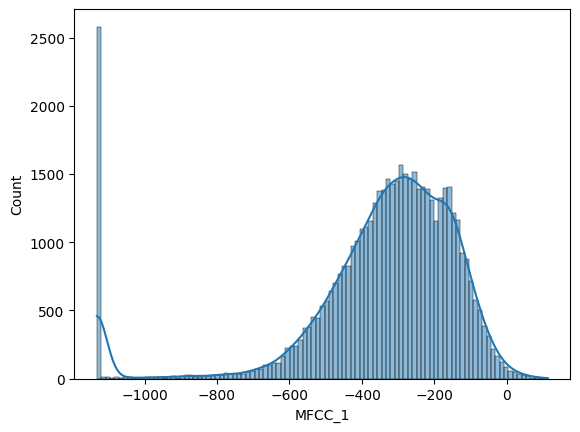

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['MFCC_1'], kde=True)
plt.show()

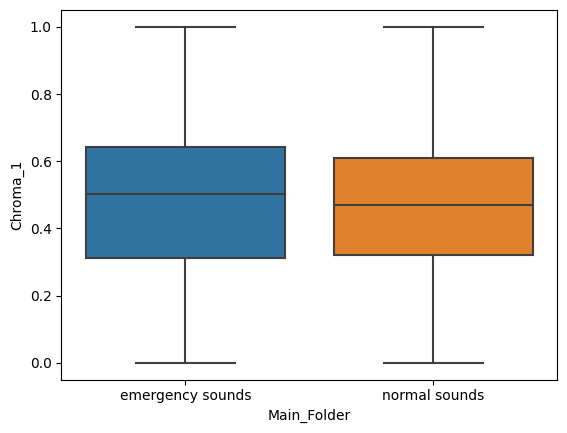

In [17]:
sns.boxplot(x='Main_Folder', y='Chroma_1', data=df)
plt.show()

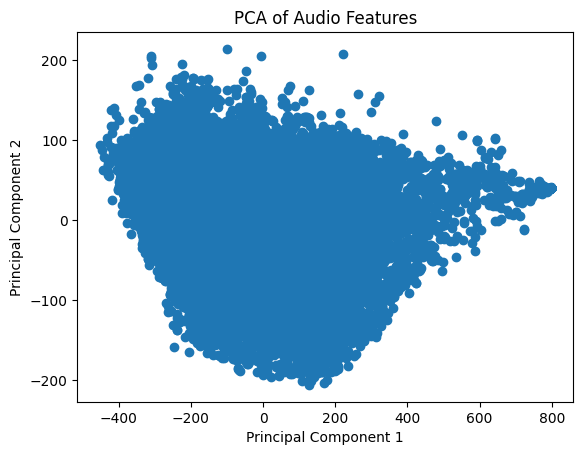

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13']])

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of Audio Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

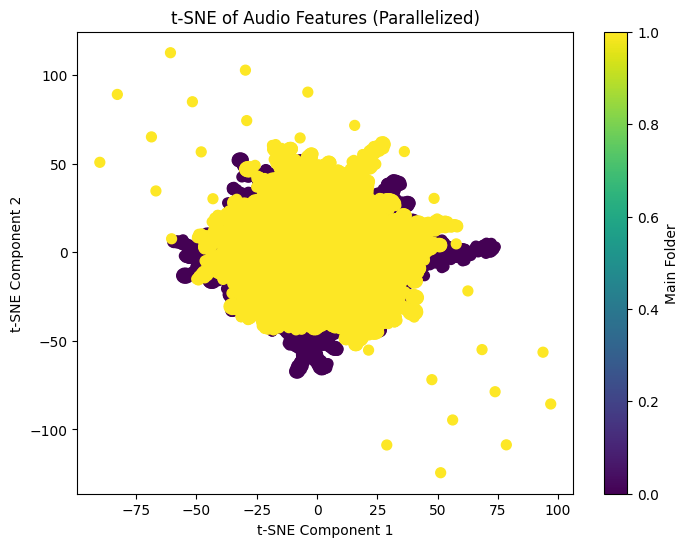

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from joblib import Parallel, delayed
import ast

# Assuming 'df' is your dataframe and contains the relevant columns

# Function to convert string representation of lists to float
def convert_to_float(value):
    if isinstance(value, str) and value.startswith('[') and value.endswith(']'):
        return float(ast.literal_eval(value)[0])  # Get the first element and convert to float
    return float(value)

# Convert necessary columns (e.g., MFCC_1, MFCC_2, etc.) to numeric values
columns_to_convert = ['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7',
                      'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13',
                      'Chroma_1', 'Chroma_2', 'Chroma_3', 'Chroma_4', 'Chroma_5', 'Chroma_6',
                      'Chroma_7', 'Chroma_8', 'Chroma_9', 'Chroma_10', 'Chroma_11', 'Chroma_12',
                      'Spectral_Contrast_1', 'Spectral_Contrast_2', 'Spectral_Contrast_3',
                      'Spectral_Contrast_4', 'Spectral_Contrast_5', 'Spectral_Contrast_6',
                      'Spectral_Contrast_7', 'Spectral_Centroid', 'Spectral_Bandwidth',
                      'Spectral_Rolloff', 'Zero_Crossing_Rate', 'RMS', 'Tempo', 'Pitch']

for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_float)

# Convert 'Main_Folder' to numeric labels
label_encoder = LabelEncoder()
df['Main_Folder_Label'] = label_encoder.fit_transform(df['Main_Folder'])

# Split the dataframe into smaller chunks for parallelization
def parallel_tsne(chunk_df, columns):
    tsne = TSNE(n_components=2, n_jobs=1)  # n_jobs=1 here means each call of t-SNE will be executed in a single thread
    return tsne.fit_transform(chunk_df[columns])

# Split the dataframe into 70 chunks (for 70 cores)
num_chunks = 70
chunk_size = len(df) // num_chunks
chunks = [df.iloc[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

# Run t-SNE in parallel over the chunks
results = Parallel(n_jobs=70)(delayed(parallel_tsne)(chunk, columns_to_convert) for chunk in chunks)

# Combine the results from all chunks
tsne_result = np.vstack(results)

# Scatter plot of t-SNE result, color by the numeric labels of 'Main_Folder'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['Main_Folder_Label'], cmap='viridis', s=50)

# Add color bar with labels
plt.colorbar(scatter, label='Main Folder')
plt.title('t-SNE of Audio Features (Parallelized)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

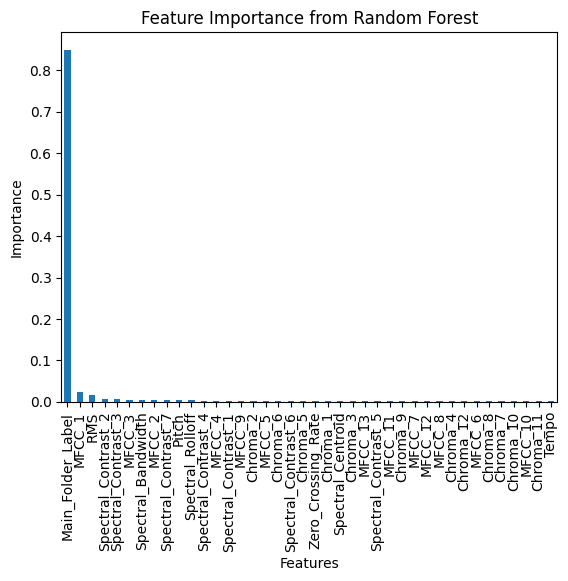

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Make sure the features used for training are numeric
# Exclude 'File', 'Main_Folder', and 'Subdirectory' from the features
X = df.drop(columns=['File', 'Main_Folder', 'Subdirectory'])

# Convert the target variable 'Main_Folder' into numeric labels
# label_encoder = LabelEncoder()
# df['Main_Folder'] = label_encoder.fit_transform(df['Main_Folder'])

# Define the features (X) and target (y)
y = df['Main_Folder']

# Create and train the RandomForest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the feature importance
feature_importance.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()